In [1]:
#just a simple data read-in and display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('exercise_1_dataset.csv')
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,target_variable
0,3.07,4776.48,2.13,500.00,5.19,4.26,2.50,4.02,6.91,5.22,...,NaN,500.00,3729.87,5.58,0.00,0.00,0.03,NaN,NaN,NaN
1,4.28,318.50,2.90,154.09,0.24,5.39,3.22,4.95,5.84,0.17,...,0.07,318.50,154.09,0.10,18.27,1.35,0.17,0.63,0.63,-0.333333
2,0.00,1776.99,2.34,0.00,0.00,0.00,2.34,0.00,7.71,0.94,...,NaN,0.00,1999.39,0.96,0.00,0.00,0.12,0.00,0.00,-1.000000
3,4.28,325.59,3.01,276.88,0.69,5.39,2.91,5.80,6.59,0.46,...,0.07,325.59,276.88,0.51,10.22,1.26,0.33,0.65,0.65,-0.218182
4,0.87,253.82,3.50,113.25,0.59,5.47,3.03,3.68,5.50,0.31,...,0.06,500.00,113.25,0.31,103.78,0.00,NaN,0.43,0.43,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,NaN,346.08,3.00,0.00,0.93,1.85,2.83,2.40,2.59,0.36,...,0.12,346.08,700.38,0.88,28.17,0.24,0.14,NaN,NaN,NaN
798,NaN,120.65,3.01,0.00,0.12,4.03,3.08,4.69,4.20,0.82,...,0.02,120.65,766.89,0.11,58.38,17.46,0.13,0.50,0.50,-0.216667
799,0.84,362.49,0.40,217.86,0.44,0.00,0.53,0.00,1.71,0.30,...,0.02,362.49,217.86,0.57,0.00,2.74,0.03,0.37,0.37,0.085106
800,0.72,402.51,5.41,289.03,1.00,0.00,2.52,0.00,1.56,0.46,...,0.02,402.51,282.49,1.16,0.00,0.81,0.09,0.46,0.46,0.581818


I see the data has 28 features, each with a different range. For regressions, it's good to have your data normalized so that the absolute values of the data don't play a big role in the fit parameters. Then I do a very simple normalization based on the min max values of each feature.

Now we come to the problem of handling the missing data, first we want to see where and how much of the data is missing.

In [3]:
df.isna().sum()

feature_1           90
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
feature_10           0
feature_11           4
feature_12           0
feature_13           0
feature_14           0
feature_15          81
feature_16           0
feature_17           0
feature_18           0
feature_19           0
feature_20          57
feature_21           0
feature_22           0
feature_23           0
feature_24           8
feature_25           8
feature_26          79
feature_27         246
feature_28         246
target_variable     92
dtype: int64

Features 27 and 28 are particularly badly affected. Of particular concern is that the target variable is missing for 92 instances. We can't use these rows for fitting.

In [19]:
df.dropna(subset=['target_variable'],inplace=True)
df.isna().sum(),df.shape

(feature_1           69
 feature_2            0
 feature_3            0
 feature_4            0
 feature_5            0
 feature_6            0
 feature_7            0
 feature_8            0
 feature_9            0
 feature_10           0
 feature_11           1
 feature_12           0
 feature_13           0
 feature_14           0
 feature_15           0
 feature_16           0
 feature_17           0
 feature_18           0
 feature_19           0
 feature_20           5
 feature_21           0
 feature_22           0
 feature_23           0
 feature_24           0
 feature_25           0
 feature_26          71
 feature_27         178
 feature_28         178
 target_variable      0
 dtype: int64,
 (710, 29))

After dropping the missing target variable rows, we see that the missing values in the other features have not reduced. Features 27 and 28 have too many missing values and any imputation of these will introduce significant biases. We therefore drop these two variables from the analysis.

In [21]:
df.drop(['feature_27','feature_28'],axis=1,inplace=True)
df.isna().sum(),df.shape

(feature_1          69
 feature_2           0
 feature_3           0
 feature_4           0
 feature_5           0
 feature_6           0
 feature_7           0
 feature_8           0
 feature_9           0
 feature_10          0
 feature_11          1
 feature_12          0
 feature_13          0
 feature_14          0
 feature_15          0
 feature_16          0
 feature_17          0
 feature_18          0
 feature_19          0
 feature_20          5
 feature_21          0
 feature_22          0
 feature_23          0
 feature_24          0
 feature_25          0
 feature_26         71
 target_variable     0
 dtype: int64,
 (710, 27))

Feature 1 and 26 still have about 10% of values missing, we have a look at the distribution of different variables to decide what would be a good way to impute missing values.

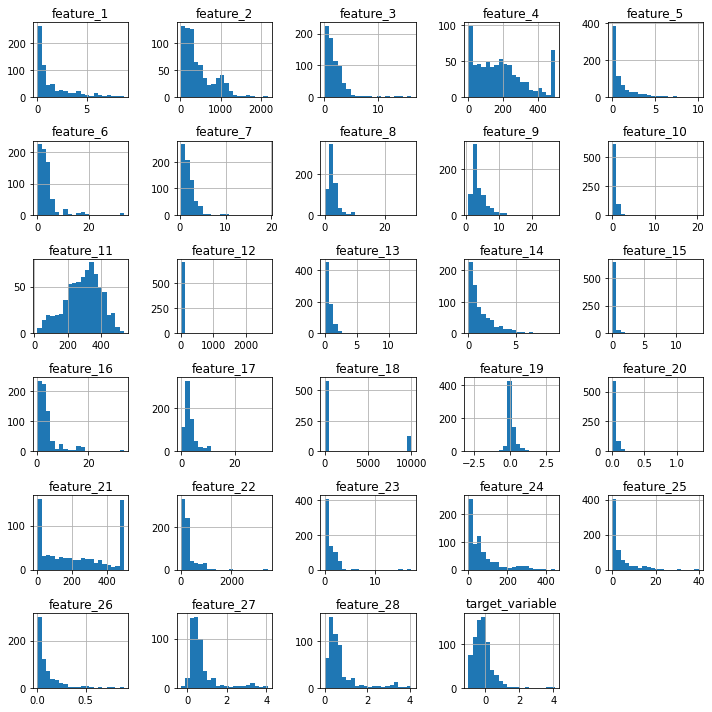

In [17]:
df.hist(bins=20,figsize=(10,10))
plt.tight_layout()

Most variables seem to have long tailed distributions with positive skews. Let's have a quick look at the correlations within the data.

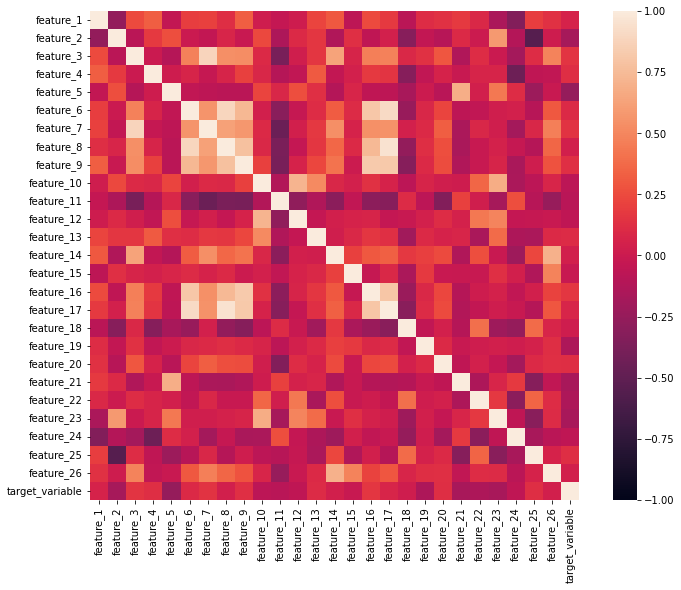

In [25]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True);

It seems most features are at best weakly correlated with the target variable. Ideally we'd like to do some feature engineering to create features with stronger predictive power but since we don't know anything about what these features are it is hard to do. Let's start by a simple mean imputation of the missing values.

In [37]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
df2 = pd.DataFrame(imp.fit_transform(df),index=df.index,columns=df.columns)
df2

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,target_variable
1,4.28,318.50,2.90,154.09,0.24,5.39,3.22,4.95,5.84,0.17,...,55.84,0.30,0.07,318.50,154.09,0.10,18.27,1.35,0.17,-0.333333
2,0.00,1776.99,2.34,0.00,0.00,0.00,2.34,0.00,7.71,0.94,...,259.44,0.63,0.02,0.00,1999.39,0.96,0.00,0.00,0.12,-1.000000
3,4.28,325.59,3.01,276.88,0.69,5.39,2.91,5.80,6.59,0.46,...,15.35,0.35,0.07,325.59,276.88,0.51,10.22,1.26,0.33,-0.218182
4,0.87,253.82,3.50,113.25,0.59,5.47,3.03,3.68,5.50,0.31,...,15.50,-0.36,0.06,500.00,113.25,0.31,103.78,0.00,0.05,0.062500
5,2.45,92.85,1.81,446.88,0.26,16.40,1.92,6.38,10.51,0.21,...,92.27,0.53,0.12,270.92,149.43,0.16,7.13,4.64,0.10,-0.622642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,1.29,305.15,4.47,116.54,1.48,0.00,3.25,0.00,2.92,1.35,...,10000.00,1.49,0.00,305.15,116.54,1.27,0.00,1.89,0.07,0.420455
798,0.62,120.65,3.01,0.00,0.12,4.03,3.08,4.69,4.20,0.82,...,10000.00,0.23,0.02,120.65,766.89,0.11,58.38,17.46,0.13,-0.216667
799,0.84,362.49,0.40,217.86,0.44,0.00,0.53,0.00,1.71,0.30,...,10000.00,-0.01,0.02,362.49,217.86,0.57,0.00,2.74,0.03,0.085106
800,0.72,402.51,5.41,289.03,1.00,0.00,2.52,0.00,1.56,0.46,...,10000.00,-0.09,0.02,402.51,282.49,1.16,0.00,0.81,0.09,0.581818


In [116]:
from sklearn.ensemble import RandomForestRegressor, 
from sklearn.model_selection import train_test_split

X = df2.iloc[:,:-1] #features
y = df2.iloc[:,-1] #target_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_features=15)
model.fit(X_train,y_train)

ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

In [115]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,model.predict(X_test)),
explained_variance_score(y_train,model.predict(X_train)))

0.45753541102700046 0.9103708300299066


In [52]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [58]:
print(explained_variance_score(y_train,lin_model.predict(X_train)))
explained_variance_score(y_test,lin_model.predict(X_test))

0.22954060869515114


-0.008424517499495243

In [59]:
import xgboost as xgb

In [100]:
reg = xgb.XGBRegressor(tree_method="approx",reg_alpha=0.1)#reg_lambda=10)
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=1, ...)

In [101]:
print(explained_variance_score(y_train,reg.predict(X_train)))
print(explained_variance_score(y_test,reg.predict(X_test)))

0.9996729196056924
0.5035071913566789


### Final state: I've tried a linear regression, random forest regression and xgboost and all of them are overfitting. The linear is particularly bad. Tried adding regularization but it's not really helping. Maybe the data needs to be transformed into log or something more gaussian? ###